In [1]:
import os, numpy as np
import rasterio 
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio.plot
import geopandas as gpd
from osgeo import gdal
from numpy import inf
from scipy.ndimage import convolve, generic_filter
evalPath ="C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/SDis_Self-Training/Evaluation/ams_20220323"
city ="ams"

gtPath = "C:/FUME/Dasymetric_Mapping/GroundTruth/ams/GridCells/rasters/"
cnnPath = "C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/SDis_Self-Training/Results/ams/apcnn/"
gbPath = "C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/SDis_Self-Training/Results/AgilePaper/ams/apcatbr/"
districtPath = 'C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/AncillaryData/{0}/adm/{0}_districts.geojson'.format(city)
#'children', 'students','mobadults', 'nmobadults', 'elderly', 'sur', 'ant', 'mar','tur', 'nonwestern', 'western', 'autoch'
attr_value = ['mar']
templ = rasterio.open("C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/AncillaryData/ams/template/ams_templateClipped.tif")
temp = templ.read(1)
temp = np.where(temp!=0, temp, np.nan)

In [2]:
waterPath = rasterio.open('C:/Users/NM12LQ/OneDrive - Aalborg Universitet/Dasymetric_Mapping/AncillaryData/{0}/corine/waterComb_{0}_CLC_2012_2018.tif'.format(city))
water = waterPath.read(1)
water = np.where(water>0.3, water, 0)
mask = temp * water
mask = np.where(mask==1, np.nan, mask)

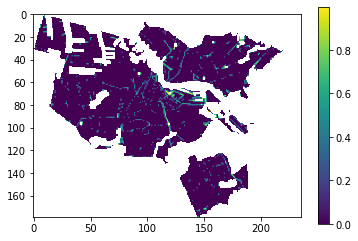

In [3]:
plt.imshow(mask)
plt.colorbar(orientation='vertical')
#plt.savefig("GR0-100.png")
plt.show()

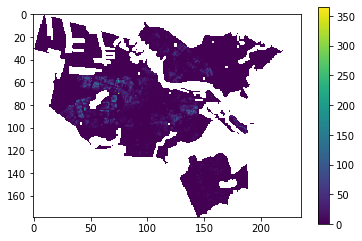

0 4


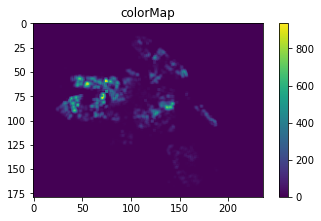

In [34]:
for i in attr_value:
    gr = rasterio.open(gtPath + "2018_ams_{}.tif".format(i))
    arrayGR = gr.read(1)
    pr = rasterio.open(cnnPath + "dissever01_CLF_2018_ams_Dasy_16unet_10epochspi_AIL12_it10_{}.tif".format(i))
    arrayPR = pr.read(1)
    pr1 = rasterio.open(gbPath + "dissever01WIESMN_500_2018_ams_DasyA_apcatbr_p[1]_12AIL12_12IL_it10_{}.tif".format(i))
    arrayPR1 = pr1.read(1)
    #cf = np.where(temp != 0, arrayGR, np.nan)
    arrayGR[np.isnan(mask)] = np.nan
    #arrayGR = np.where(arrayGR!= np.nan , arrayGR, 0)
    #arrayPR = np.nan_to_num(arrayPR, nan=0, posinf=0)
    #arrayPR1 = np.nan_to_num(arrayPR1, nan=0, posinf=0)
    
    plt.imshow(arrayGR)
    plt.colorbar(orientation='vertical')
    #plt.savefig("GR0-100.png")
    plt.show()
    
    kernel0 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel2 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    kernel3 = np.array([[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]])

    pycnodataset = generic_filter(arrayGR, np.nansum, footprint=kernel1, mode='constant', cval=np.NaN)
    
    cGR0 = convolve(arrayGR, kernel0, mode='constant')
    cGR0 = np.where(cGR0>=50, 1, 0)
    cGR1 = convolve(arrayGR, kernel1, mode='constant')
    cGR1 = np.where(cGR1>=50, 1, 0)
    cGR2 = convolve(arrayGR, kernel2, mode='constant')
    cGR2 = np.where(cGR2>=50, 1, 0)
    cGR3 = convolve(arrayGR, kernel3, mode='constant')
    cGR3 = np.where(cGR3>=50, 1, 0)
    cGR = cGR0 + cGR1 + cGR2 + cGR3
    #cGR[np.isnan(temp)] = np.nan
    print(np.min(cGR), np.max(cGR))
    fig = plt.figure(figsize=(6, 3.2))
    ax = fig.add_subplot(111)
    ax.set_title('colorMap')

    plt.imshow(pycnodataset)
    plt.colorbar(orientation='vertical')
    #plt.savefig("GR0-100.png")
    plt.show()
    #cPR = convolve(arrayPR, kernel, mode='constant')
    #cPR1 = convolve(arrayPR1, kernel, mode='constant')

In [39]:
def calcConv(inpuPath, nnn ):
    src = rasterio.open(inpuPath)
    arr = src.read(1)
    kernel0 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel2 = np.array([[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]])
    kernel3 = np.array([[0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0]])
    kernel4 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    kernel5 = np.array([[0, 0, 0, 1, 0, 0, 0], 
                        [0, 0, 1, 1, 1, 0, 0], 
                        [0, 1, 1, 1, 1, 1, 0], 
                        [1, 1, 1, 1, 1, 1, 1], 
                        [0, 1, 1, 1, 1, 1, 0], 
                        [0, 0, 1, 1, 1, 0, 0], 
                        [0, 0, 0, 1, 0, 0, 0]])

    kernel6 = np.array([[0, 0, 1, 1, 1, 0, 0], 
                        [0, 1, 1, 1, 1, 1, 0], 
                        [1, 1, 1, 1, 1, 1, 1], 
                        [1, 1, 1, 1, 1, 1, 1], 
                        [1, 1, 1, 1, 1, 1, 1], 
                        [0, 1, 1, 1, 1, 1, 0], 
                        [0, 0, 1, 1, 1, 0, 0]])

    kernel7 = np.array([[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]])

    c0 = convolve(arr, kernel0, mode='constant')
    print(np.max(c0))
    c0 = np.where(c0>=nnn, 0, 1)
    c1 = convolve(arr, kernel1, mode='constant')
    c1 = np.where(c1>=nnn, 0, 1)
    c2 = convolve(arr, kernel2, mode='constant')
    c2 = np.where(c2>=nnn, 0, 1)
    c3 = convolve(arr, kernel3, mode='constant')
    c3 = np.where(c3>=nnn, 0, 1)
    c4 = convolve(arr, kernel4, mode='constant')
    c4 = np.where(c4>=nnn, 0, 1)
    c5 = convolve(arr, kernel5, mode='constant')
    c5 = np.where(c5>=nnn, 0, 1 )
    c6 = convolve(arr, kernel6, mode='constant')
    c6 = np.where(c6>=nnn, 0, 1)
    c7 = convolve(arr, kernel7, mode='constant')
    print(np.max(c7))
    c7 = np.where(c7>=nnn, 0, 1)
    c = c0 + c1 + c2 + c3 + c4 + c5 + c6 + c7
    #c[np.isnan(temp)] = np.nan
    ds = gdal.Open(path + "{0}_{1}.tif".format(filename,i))
    write_gtiff(cGR, ds, "{0}_{1}.tif".format(filename,i), dtype=gdal.GDT_UInt16, options=0, color_table=0, nbands=1, nodata=False)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_title('colorMap')

    plt.imshow(c)
    plt.colorbar(orientation='vertical')
    #plt.savefig("GR0-100.png")
    plt.show()

In [40]:
path = gtPath + "2018_ams_mar.tif"
calcConv(path, 50)

672.0
2739.0


ValueError: cannot convert float NaN to integer

In [7]:
for i in attr_value:
    gr = rasterio.open(gtPath + "2018_ams_{}.tif".format(i))
    arrayGR = gr.read(1)
    pr = rasterio.open(cnnPath + "dissever01_CLF_2018_ams_Dasy_16unet_10epochspi_AIL12_it10_{}.tif".format(i))
    arrayPR = pr.read(1)
    pr1 = rasterio.open(gbPath + "dissever01WIESMN_500_2018_ams_DasyA_apcatbr_p[1]_12AIL12_12IL_it10_{}.tif".format(i))
    arrayPR1 = pr1.read(1)
    arrayGR[np.isnan(temp)] = np.nan
    #arrayGR = np.where(arrayGR!= np.nan , arrayGR, 0)
    #arrayPR = np.nan_to_num(arrayPR, nan=0, posinf=0)
    #arrayPR1 = np.nan_to_num(arrayPR1, nan=0, posinf=0)
    
    kernel0 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    kernel2 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    kernel3 = np.array([[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]])

    cGR0 = convolve(arrayGR, kernel0, mode='constant')
    cGR0 = np.where(cGR0>=50, 1, 0)
    cGR1 = convolve(arrayGR, kernel1, mode='constant')
    cGR1 = np.where(cGR1>=50, 1, 0)
    cGR2 = convolve(arrayGR, kernel2, mode='constant')
    cGR2 = np.where(cGR2>=50, 1, 0)
    cGR3 = convolve(arrayGR, kernel3, mode='constant')
    cGR3 = np.where(cGR3>=50, 1, 0)
    cGR = cGR0 + cGR1 + cGR2 + cGR3
    cGR[np.isnan(temp)] = np.nan
    print(np.min(cGR), np.max(cGR))
    fig = plt.figure(figsize=(6, 3.2))
    ax = fig.add_subplot(111)
    ax.set_title('colorMap')

    plt.imshow(cGR)
    plt.colorbar(orientation='vertical')
    #plt.savefig("GR0-100.png")
    plt.show()
    #cPR = convolve(arrayPR, kernel, mode='constant')
    #cPR1 = convolve(arrayPR1, kernel, mode='constant')

ValueError: cannot convert float NaN to integer